In [150]:
!pip install labelme tensorflow opencv-python-headless albumentations matplotlib
#tensorflow-gpu opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [151]:
!pip install matplotlib
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

import os
import time
import uuid
import cv2

Defaulting to user installation because normal site-packages is not writeable


In [152]:
gpus = tf.config.experimental.list_physical_devices('GPU')

print("GPUs:", gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


RuntimeError: Physical devices cannot be modified after being initialized

In [29]:
!ls git/computer-vision-cognitionnotebooks/colab_images/images/

ls: cannot access 'git/computer-vision-cognitionnotebooks/colab_images/images/': No such file or directory


In [27]:
images = tf.data.Dataset.list_files("git/computer-vision-cognitionnotebooks/colab_images/images/*.jpg", shuffle=False)
images.as_numpy_iterator().next()

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: git/computer-vision-cognitionnotebooks/colab_images/images/*.jpg'

In [11]:
!ls /home/nickage/git/computer-vision-cognition/notebooks/colab_images/images/*.jpg

ls: cannot access '/home/nickage/git/computer-vision-cognition/notebooks/colab_images/images/*.jpg': No such file or directory


In [13]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img



In [ ]:
images = images.map(load_image)

images.as_numpy_iterator().next()

In [47]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [48]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

2023-10-08 18:12:04.283450: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /home/nickage/git/computer-vision-cognition/notebooks/colab_images/images/f5ef4812-5f52-11ee-84f1-286b35026e3f.jpg; No such file or directory
2023-10-08 18:12:04.283519: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /home/nickage/git/computer-vision-cognition/notebooks/colab_images/images/90cc7338-5f52-11ee-84f1-286b35026e3f.jpg; No such file or directory
2023-10-08 18:12:04.283574: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /home/nickage/git/computer-vision-cognition/notebooks/colab_images/images/9078e36c-5f52-11ee-84f1-286b35026e3f.jpg; No such file or directory
2023-10-08 18:12:04.283627: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /home/nickage/git/computer

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} /home/nickage/git/computer-vision-cognition/notebooks/colab_images/images/9120a0e8-5f52-11ee-84f1-286b35026e3f.jpg; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext] name: 

In [ ]:
#train 67 imgs, eval 19 imgs, test 14 imgs

In [30]:
for folder in ['train','test','eval']:
    for file in os.listdir(os.path.join('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/', folder, 'images')):
        print("file path:", file)
        filename = file.split('.')[0]+'.json'
        print("file name:", filename)
        existing_filepath = os.path.join('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/','labels', filename)
        print(existing_filepath)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/',folder,'labels',filename)
            print(new_filepath)
            os.replace(existing_filepath, new_filepath)

file path: 1e89fd94-5f53-11ee-84f1-286b35026e3f.jpg
file name: 1e89fd94-5f53-11ee-84f1-286b35026e3f.json
/home/nickage/git/computer-vision-cognition/notebooks/colab_images/labels/1e89fd94-5f53-11ee-84f1-286b35026e3f.json
file path: 1e3542cc-5f53-11ee-84f1-286b35026e3f.jpg
file name: 1e3542cc-5f53-11ee-84f1-286b35026e3f.json
/home/nickage/git/computer-vision-cognition/notebooks/colab_images/labels/1e3542cc-5f53-11ee-84f1-286b35026e3f.json
file path: 1ede0664-5f53-11ee-84f1-286b35026e3f.jpg
file name: 1ede0664-5f53-11ee-84f1-286b35026e3f.json
/home/nickage/git/computer-vision-cognition/notebooks/colab_images/labels/1ede0664-5f53-11ee-84f1-286b35026e3f.json
file path: 1f320c3c-5f53-11ee-84f1-286b35026e3f.jpg
file name: 1f320c3c-5f53-11ee-84f1-286b35026e3f.json
/home/nickage/git/computer-vision-cognition/notebooks/colab_images/labels/1f320c3c-5f53-11ee-84f1-286b35026e3f.json
file path: 1f8654fe-5f53-11ee-84f1-286b35026e3f.jpg
file name: 1f8654fe-5f53-11ee-84f1-286b35026e3f.json
/home/nicka

In [38]:
!ls /home/nickage/git/computer-vision-cognition/notebooks/colab_images/eval/images/

b10659a2-5f52-11ee-84f1-286b35026e3f.jpg
b15a5700-5f52-11ee-84f1-286b35026e3f.jpg
f2535216-5f52-11ee-84f1-286b35026e3f.jpg
f547ca42-5f52-11ee-84f1-286b35026e3f.jpg
f59b64ae-5f52-11ee-84f1-286b35026e3f.jpg
f6432c66-5f52-11ee-84f1-286b35026e3f.jpg
f6968082-5f52-11ee-84f1-286b35026e3f.jpg
f73e84e4-5f52-11ee-84f1-286b35026e3f.jpg
f7927798-5f52-11ee-84f1-286b35026e3f.jpg
f83a07ce-5f52-11ee-84f1-286b35026e3f.jpg
f88d7a6c-5f52-11ee-84f1-286b35026e3f.jpg
f9353c0c-5f52-11ee-84f1-286b35026e3f.jpg
f989a828-5f52-11ee-84f1-286b35026e3f.jpg
fa31f9f6-5f52-11ee-84f1-286b35026e3f.jpg
fa857888-5f52-11ee-84f1-286b35026e3f.jpg
fad925be-5f52-11ee-84f1-286b35026e3f.jpg
fb2d12e6-5f52-11ee-84f1-286b35026e3f.jpg
fb807184-5f52-11ee-84f1-286b35026e3f.jpg
fbd47950-5f52-11ee-84f1-286b35026e3f.jpg


Defaulting to user installation because normal site-packages is not writeable


In [187]:
!pip3 install albumentations

import albumentations as alb

album = alb.Compose([alb.RandomCrop(width=450, height=450), 
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2), 
    alb.RGBShift(p=0.2), 
    alb.VerticalFlip(p=0.5)],
    bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

album

Defaulting to user installation because normal site-packages is not writeable


Compose([
  RandomCrop(always_apply=False, p=1.0, height=450, width=450),
  HorizontalFlip(always_apply=False, p=0.5),
  RandomBrightnessContrast(always_apply=False, p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  RandomGamma(always_apply=False, p=0.2, gamma_limit=(80, 120), eps=None),
  RGBShift(always_apply=False, p=0.2, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
  VerticalFlip(always_apply=False, p=0.5),
], p=1.0, bbox_params={'format': 'albumentations', 'label_fields': ['class_labels'], 'min_area': 0.0, 'min_visibility': 0.0, 'min_width': 0.0, 'min_height': 0.0, 'check_each_transform': True}, keypoint_params=None, additional_targets={}, is_check_shapes=True)

In [188]:
#img1 = cv2.imread(os.path.join('git','computer-vision-cognition','notebooks','colab_images','train','images','2810a994-5f53-11ee-84f1-286b35026e3f.jpg'))

resize_transform = alb.Resize(width=960, height=540)
img1 = cv2.imread(os.path.join('git','computer-vision-cognition','notebooks','colab_images','train','images','2810a994-5f53-11ee-84f1-286b35026e3f.jpg'))
# Apply the resizing transformation to the image
img1 = resize_transform(image=img1)['image']

img1.shape

(540, 960, 3)

In [189]:
img_file_location = os.path.join('git','computer-vision-cognition','notebooks','colab_images','train','labels','2810a994-5f53-11ee-84f1-286b35026e3f.json')
img_file_location

'git/computer-vision-cognition/notebooks/colab_images/train/labels/2810a994-5f53-11ee-84f1-286b35026e3f.json'

In [190]:
with open(img_file_location, 'r') as file:    
    label = json.load(file)
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[813.4883720930234, 237.09302325581396],
    [1116.9767441860465, 595.2325581395348]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '../images/2810a994-5f53-11ee-84f1-286b35026e3f.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQ4B4ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRom

In [191]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords
coords = list(np.divide(coords, [1920,1080,1920,1080]))
coords

[0.42369186046511637,
 0.21953057708871662,
 0.5817587209302325,
 0.5511412575366064]

In [192]:
augmented = augmentor(image=img1, bboxes=[coords], class_labels=['face'])
augmented
#augmented['bboxes']

{'image': array([[[163, 161, 173],
         [165, 161, 173],
         [166, 162, 174],
         ...,
         [  6,   3,  12],
         [  4,   0,   8],
         [  7,   2,  10]],
 
        [[167, 166, 176],
         [165, 164, 174],
         [169, 165, 175],
         ...,
         [ 10,   3,  13],
         [ 14,   6,  17],
         [ 13,   4,  16]],
 
        [[170, 170, 176],
         [166, 165, 172],
         [172, 171, 178],
         ...,
         [ 12,   5,  11],
         [ 19,   9,  19],
         [ 21,   9,  22]],
 
        ...,
 
        [[139, 147, 160],
         [139, 147, 160],
         [139, 147, 160],
         ...,
         [139, 145, 158],
         [139, 145, 158],
         [139, 145, 158]],
 
        [[139, 147, 160],
         [139, 147, 160],
         [139, 147, 160],
         ...,
         [139, 145, 158],
         [139, 145, 158],
         [139, 145, 158]],
 
        [[139, 147, 160],
         [139, 147, 160],
         [139, 147, 160],
         ...,
         [139, 145,

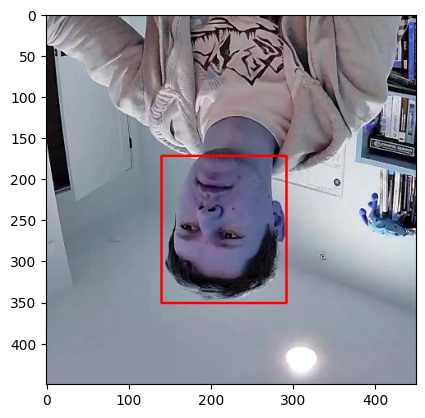

In [193]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [200]:
for partition in ['train','test','eval']: 
    for image in os.listdir(os.path.join('git','computer-vision-cognition','notebooks','colab_images',partition,'images')):
        print("Working on", image)
        #img = cv2.imread(os.path.join('data', partition, 'images', image))
        resize_transform = alb.Resize(width=960, height=540)
        img = cv2.imread(os.path.join('git','computer-vision-cognition','notebooks','colab_images',partition,'images',image))
        print(img)
        # Apply the resizing transformation to the image
        img = resize_transform(image=img)['image']

        coords = [0,0,0.00001,0.00001]
        #'git','computer-vision-cognition','notebooks','colab_images','train','labels','2810a994-5f53-11ee-84f1-286b35026e3f.json'
        label_path = os.path.join('git','computer-vision-cognition','notebooks','colab_images',partition,'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1920,1080,1920,1080]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('git','computer-vision-cognition','notebooks','colab_images','aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('git','computer-vision-cognition','notebooks','colab_images','aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Working on 1e89fd94-5f53-11ee-84f1-286b35026e3f.jpg
[[[ 54  43  45]
  [ 65  54  56]
  [ 80  69  71]
  ...
  [163 163 169]
  [164 164 170]
  [163 163 169]]

 [[ 37  26  28]
  [ 47  36  38]
  [ 62  51  53]
  ...
  [163 163 169]
  [164 164 170]
  [163 163 169]]

 [[ 55  44  46]
  [ 60  49  51]
  [ 80  69  71]
  ...
  [163 163 169]
  [164 164 170]
  [162 162 168]]

 ...

 [[127 107 112]
  [122 102 107]
  [123 103 108]
  ...
  [ 76  71  70]
  [ 75  70  69]
  [ 75  70  69]]

 [[127 107 112]
  [125 105 110]
  [126 106 111]
  ...
  [ 75  70  69]
  [ 74  69  68]
  [ 74  69  68]]

 [[127 107 112]
  [127 107 112]
  [128 108 113]
  ...
  [ 74  69  68]
  [ 73  68  67]
  [ 72  67  66]]]
Working on 1e3542cc-5f53-11ee-84f1-286b35026e3f.jpg
[[[ 54  43  45]
  [ 65  54  56]
  [ 80  69  71]
  ...
  [163 163 169]
  [164 164 170]
  [163 163 169]]

 [[ 37  26  28]
  [ 47  36  38]
  [ 62  51  53]
  ...
  [163 163 169]
  [164 164 170]
  [163 163 169]]

 [[ 55  44  46]
  [ 60  49  51]
  [ 80  69  71]
  ...
  [1

In [203]:
train_img_dataset = tf.data.Dataset.list_files('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/aug_data/train/images/*.jpg', shuffle=False)
train_img_dataset = train_img_dataset.map(load_image)
train_img_dataset = train_img_dataset.map(lambda x: tf.image.resize(x, (120,120)))
train_img_dataset = train_img_dataset.map(lambda x: x/255)

test_img_dataset = tf.data.Dataset.list_files('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/aug_data/test/images/*.jpg', shuffle=False)
test_img_dataset = test_img_dataset.map(load_image)
test_img_dataset = test_img_dataset.map(lambda x: tf.image.resize(x, (120,120)))
test_img_dataset = test_img_dataset.map(lambda x: x/255)

eval_img_dataset = tf.data.Dataset.list_files('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/aug_data/eval/images/*.jpg', shuffle=False)
eval_img_dataset = eval_img_dataset.map(load_image)
eval_img_dataset = eval_img_dataset.map(lambda x: tf.image.resize(x, (120,120)))
eval_img_dataset = eval_img_dataset.map(lambda x: x/255)


In [204]:
train_img_dataset.as_numpy_iterator().next()

array([[[0.03621323, 0.02542892, 0.07935049],
        [0.04785539, 0.04178922, 0.096875  ],
        [0.05851716, 0.053125  , 0.10802696],
        ...,
        [0.4266544 , 0.3874387 , 0.41881126],
        [0.42781863, 0.38860294, 0.4199755 ],
        [0.47671568, 0.43596813, 0.46734068]],

       [[0.10490196, 0.08137255, 0.13566177],
        [0.10238971, 0.07542892, 0.13719362],
        [0.10931373, 0.08186275, 0.14460784],
        ...,
        [0.5925858 , 0.5690564 , 0.58474267],
        [0.5753676 , 0.5518382 , 0.5675245 ],
        [0.5800245 , 0.54791665, 0.57218134]],

       [[0.13425244, 0.12248775, 0.15778187],
        [0.1252451 , 0.11348039, 0.15061274],
        [0.11623774, 0.10447304, 0.14160539],
        ...,
        [0.3778186 , 0.3542892 , 0.36997548],
        [0.32922795, 0.30569854, 0.32138482],
        [0.36433825, 0.3408088 , 0.3564951 ]],

       ...,

       [[0.58480394, 0.54558825, 0.4985294 ],
        [0.5892157 , 0.54901963, 0.5019608 ],
        [0.59607846, 0

In [205]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [209]:
train_labels_dataset = tf.data.Dataset.list_files('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/aug_data/train/labels/*.json', shuffle=False)
train_labels_dataset = train_labels_dataset.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels_dataset = tf.data.Dataset.list_files('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/aug_data/test/labels/*.json', shuffle=False)
test_labels_dataset = test_labels_dataset.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

eval_labels_dataset = tf.data.Dataset.list_files('/home/nickage/git/computer-vision-cognition/notebooks/colab_images/aug_data/eval/labels/*.json', shuffle=False)
eval_labels_dataset = eval_labels_dataset.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

eval_labels_dataset

<_MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None))>

In [210]:
len(train_img_dataset), len(train_labels_dataset), len(test_img_dataset), len(test_labels_dataset), len(eval_img_dataset), len(eval_labels_dataset)

(4080, 4080, 840, 840, 1140, 1140)

In [ ]:
!hostname